### Exercise 5 : Classification Tree

#### Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

In [385]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [386]:
data = pd.read_csv('train.csv')
saleprice = pd.DataFrame(data['SalePrice'])
centralair = pd.DataFrame(data['CentralAir'])


 a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max 
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

In [387]:
#define a function that help us to split any dataframes into train and set
#def trainAndTest(predictor,response,testSize = 0.2):
    #x_train,y_train,x_test,y_test = train_test_split(predictor,response,test_size = testSize)
    #return (x_train,y_train,x_test,y_test)

#tuple[0] == x_train
#tuple[1] == y_train
#tuple[2] == x_test
#tuple[3] == y_test
#print("Train set\t:",tuple[0].shape, tuple[1].shape)
#print("Test set\t:",tuple[2].shape, tuple[3].shape)

##### Using saleprice_train as Predictor and centralair_train as Response

In [388]:
#we split the datasets into train and test sets in a random 80:20 ratio
saleprice_train,saleprice_test,centralair_train,centralair_test = train_test_split(saleprice,centralair,test_size = 0.2)

#we will print out the number of datapoints in each sets to verify it
print("DATA SET\t[{0},{1}]".format("centralAir","SalePrice"))
print("Train set\t:{0},{1}".format(centralair_train.shape,saleprice_train.shape))
print("Test set\t:{0},{1}".format(centralair_test.shape,saleprice_test.shape))


DATA SET	[centralAir,SalePrice]
Train set	:(1168, 1),(1168, 1)
Test set	:(292, 1),(292, 1)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

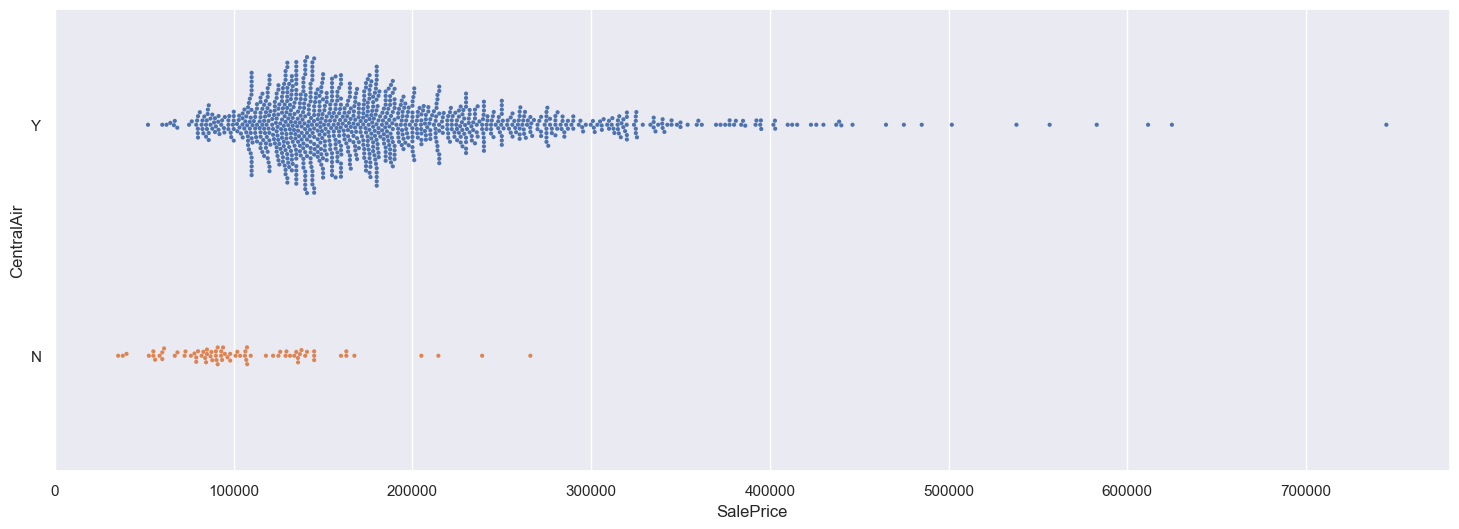

In [389]:
trainDF = pd.concat([saleprice_train,centralair_train], axis = 1).reindex(saleprice_train.index)
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h", s = 3)

Conclusion drawn from this swarmplot : <br>
By analyzing this swarmplot, we can see that building without "CentralAir" will not be able to fetch greater than $300000 in "SalePrice" . Similarly, buildings with "centralAir" has higher command of "SalePrice" as compared to buildings without. However, this analysis is done on a visual level, we will do further analysis by using decision tree & confusion matrix to help us decide if "SalePrice" has a mutual relationship with "CentralAir".


## Decision Tree & Confusion Matrix to determine "salePrice" & "CentralAir" relationship

### Decision Trees (max_depth = 2 & 4)

In [390]:
# Create a Decision Tree Classifier object
dectree_depth2 = DecisionTreeClassifier(max_depth = 2)
dectree_depth4 = DecisionTreeClassifier(max_depth = 4)
# Train the Decision Tree Classifier model
dectree_depth2.fit(saleprice_train,centralair_train)
dectree_depth4.fit(saleprice_train,centralair_train)

DecisionTreeClassifier(max_depth=4)

#### Decision Tree with max_depth = 2

[Text(0.5, 0.8333333333333334, 'SalePrice <= 107700.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes Central'),
 Text(0.25, 0.5, 'SalePrice <= 61691.5\ngini = 0.48\nsamples = 125\nvalue = [50, 75]\nclass = Yes Central'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = No Central '),
 Text(0.375, 0.16666666666666666, 'gini = 0.454\nsamples = 112\nvalue = [39, 73]\nclass = Yes Central'),
 Text(0.75, 0.5, 'SalePrice <= 145125.0\ngini = 0.05\nsamples = 1043\nvalue = [27, 1016]\nclass = Yes Central'),
 Text(0.625, 0.16666666666666666, 'gini = 0.11\nsamples = 324\nvalue = [19, 305]\nclass = Yes Central'),
 Text(0.875, 0.16666666666666666, 'gini = 0.022\nsamples = 719\nvalue = [8, 711]\nclass = Yes Central')]

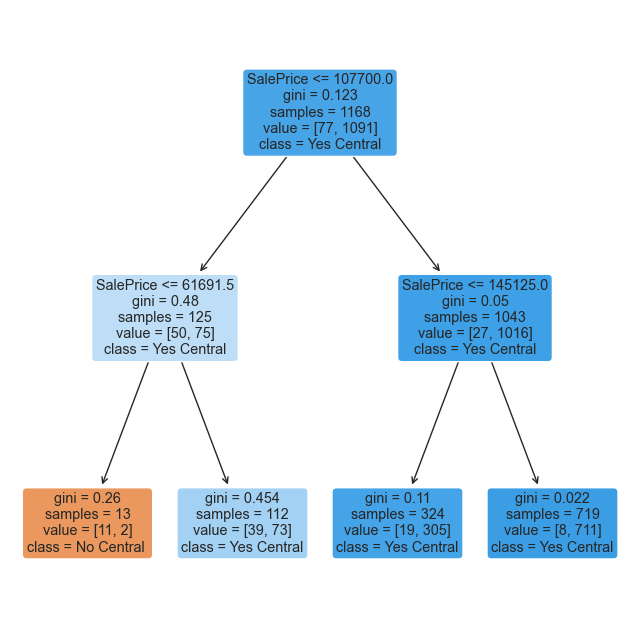

In [391]:
f = plt.figure(figsize=(8,8))
plot_tree(dectree_depth2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])


#### Decision Tree with max_depth = 4

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes Central'),
 Text(0.22, 0.7, 'SalePrice <= 61691.5\ngini = 0.48\nsamples = 125\nvalue = [50, 75]\nclass = Yes Central'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = No Central '),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No Central '),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = No Central '),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes Central'),
 Text(0.16, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No Central '),
 Text(0.36, 0.5, 'SalePrice <= 98150.0\ngini = 0.454\nsamples = 112\nvalue = [39, 73]\nclass = Yes Central'),
 Text(0.28, 0.3, 'SalePrice <= 97750.0\ngini = 0.475\nsamples = 80\nvalue = [31, 49]\nclass = Yes Central'),
 Text(0.24, 0.1, 'gini = 0.467\nsamples = 78\nvalue = [29, 49]\nclass = Yes Central'),
 Text(0.32

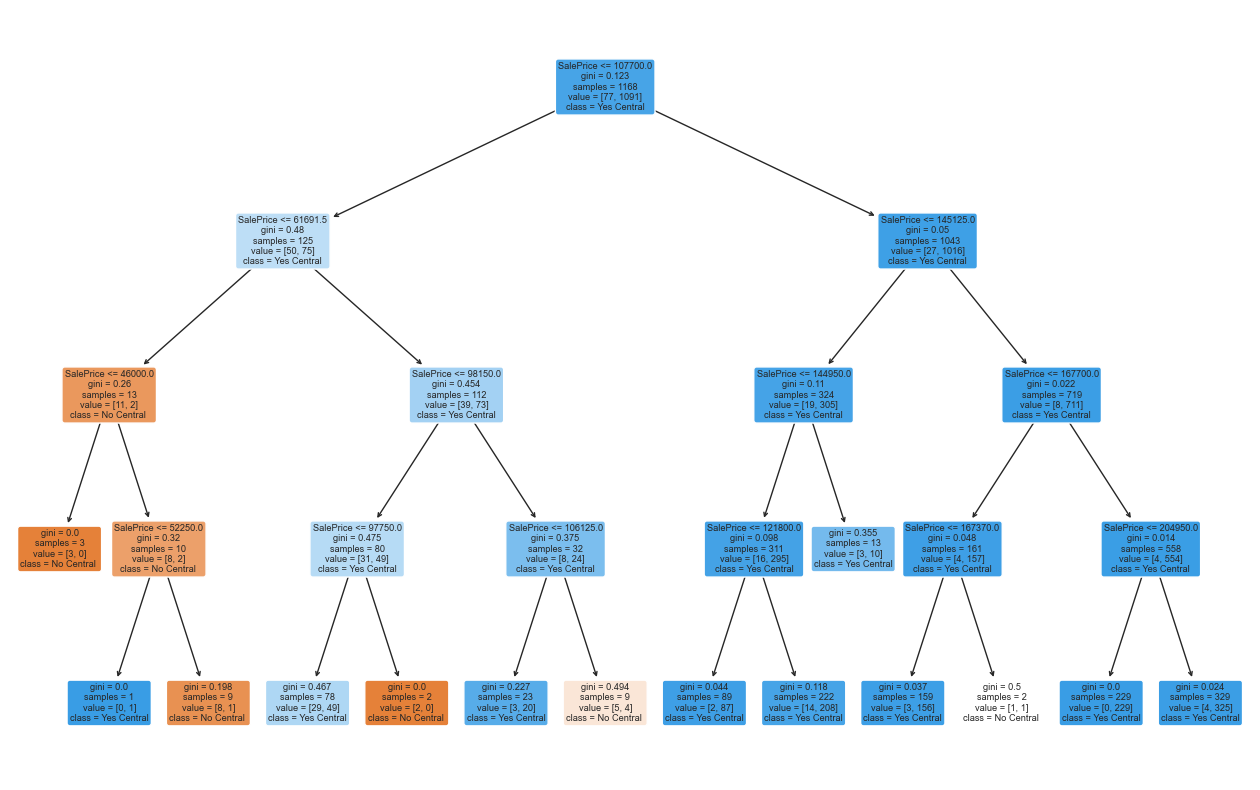

In [392]:
f = plt.figure(figsize=(16,10))
plot_tree(dectree_depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])

### Confusion Matrix on train & test sets

### Train sets on max_depth == 2 & 4

Classification Accuracy
Max Depth == 2	: 0.9417808219178082 
Max Depth == 4	: 0.9452054794520548

 	Train Set(maxdepth == 2)		 Train Set(maxdepth == 4)


<AxesSubplot:>

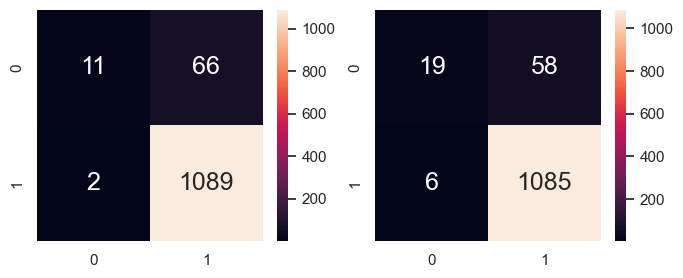

In [393]:
centralair_train_pred_depth2 = dectree_depth2.predict(saleprice_train)
centralair_train_pred_depth4 = dectree_depth4.predict(saleprice_train)

print("Classification Accuracy")
print("Max Depth == 2\t: {0} \nMax Depth == 4\t: {1}".format(dectree_depth2.score(saleprice_train,centralair_train),dectree_depth4.score(saleprice_train,centralair_train)))
print()

f,ax = plt.subplots(1,2,figsize=(8,3))
print(" \tTrain Set(maxdepth == 2)\t\t Train Set(maxdepth == 4)")
sb.heatmap(confusion_matrix(centralair_train,centralair_train_pred_depth2), annot = True,  fmt = ".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(confusion_matrix(centralair_train,centralair_train_pred_depth4), annot = True,  fmt = ".0f", annot_kws={"size": 18}, ax = ax[1])


### Test sets on max_depth == 2 & 4

Classification Accuracy
Max Depth == 2	: 0.9452054794520548 
Max Depth == 4	: 0.9417808219178082

 	Test Set(maxdepth == 2)		 Test Set(maxdepth == 4)


<AxesSubplot:>

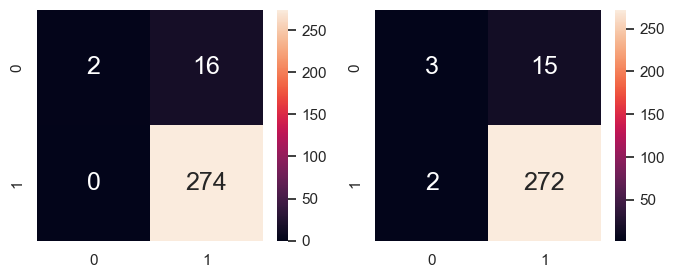

In [394]:
centralair_test_pred_depth2 = dectree_depth2.predict(saleprice_test)
centralair_test_pred_depth4 = dectree_depth4.predict(saleprice_test)

print("Classification Accuracy")
print("Max Depth == 2\t: {0} \nMax Depth == 4\t: {1}".format(dectree_depth2.score(saleprice_test,centralair_test),dectree_depth4.score(saleprice_test,centralair_test)))
print()

f,ax = plt.subplots(1,2,figsize=(8,3))
print(" \tTest Set(maxdepth == 2)\t\t Test Set(maxdepth == 4)")
sb.heatmap(confusion_matrix(centralair_test,centralair_test_pred_depth2), annot = True,  fmt = ".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(confusion_matrix(centralair_test,centralair_test_pred_depth4), annot = True,  fmt = ".0f", annot_kws={"size": 18}, ax = ax[1])

In [395]:
print("Classification Accuracy")
print("--------------Train Set--------------")
print("Max Depth - 2\t:",dectree_depth2.score(saleprice_train,centralair_train)) 
print("Max Depth - 4\t:",dectree_depth4.score(saleprice_train,centralair_train))

print()
print("--------------Test Set--------------")
print("Max Depth - 2\t:",dectree_depth2.score(saleprice_test,centralair_test)) 
print("Max Depth - 4\t:",dectree_depth4.score(saleprice_test,centralair_test))
print()

Classification Accuracy
--------------Train Set--------------
Max Depth - 2	: 0.9417808219178082
Max Depth - 4	: 0.9452054794520548

--------------Test Set--------------
Max Depth - 2	: 0.9452054794520548
Max Depth - 4	: 0.9417808219178082



### CONCLUSION 
When we compare the classification accuracy of both models (maxdepth = 2 & maxdepth = 4) respectively, we observed the following -<br>
<br>1. For the train set, we can see that classification accuracy is higher for depth 4 than depth 2. This is the intended outcome, since our classification is much more thorough,reducing the number of false negatives and false positives. Hence our result should be more or less follows the relationship between classification accuracy and depth level (Classification accuracy should increase as depth level increases) , which is what we have observed from the train set analysis.<br>
<br>2. However, when we look at test set, we do not see any visible differences between depth 2 & 4. This might be caused by the small sample size and randomized algo we have performed on the dataset. Hence, resulting in a inconsistent analysis when comparing between both models in test set. 

## Problem 2 : Predicting CentralAir using Other Variables

In [396]:
overallqual = pd.DataFrame(data["OverallQual"])
yearbuilt = pd.DataFrame(data["YearBuilt"])

#we split the datasets into train and test sets in a random 80:20 ratio
overallqual_train,overallqual_test,yearbuilt_train,yearbuilt_test = train_test_split(overallqual, yearbuilt, test_size = 0.2)

#we will print out the number of datapoints in each sets to verify it
print("DATA SET\t[{0},{1},{2}]".format("OverallQual","yearbuilt","CentralAir"))
print("Train Set\t:{0},{1},{2}".format(overallqual_train.shape,yearbuilt_train.shape,centralair_train.shape))
print("Test Set\t:{0},{1},{2}".format(overallqual_test.shape,yearbuilt_test.shape,centralair_test.shape))

DATA SET	[OverallQual,yearbuilt,CentralAir]
Train Set	:(1168, 1),(1168, 1),(1168, 1)
Test Set	:(292, 1),(292, 1),(292, 1)


<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

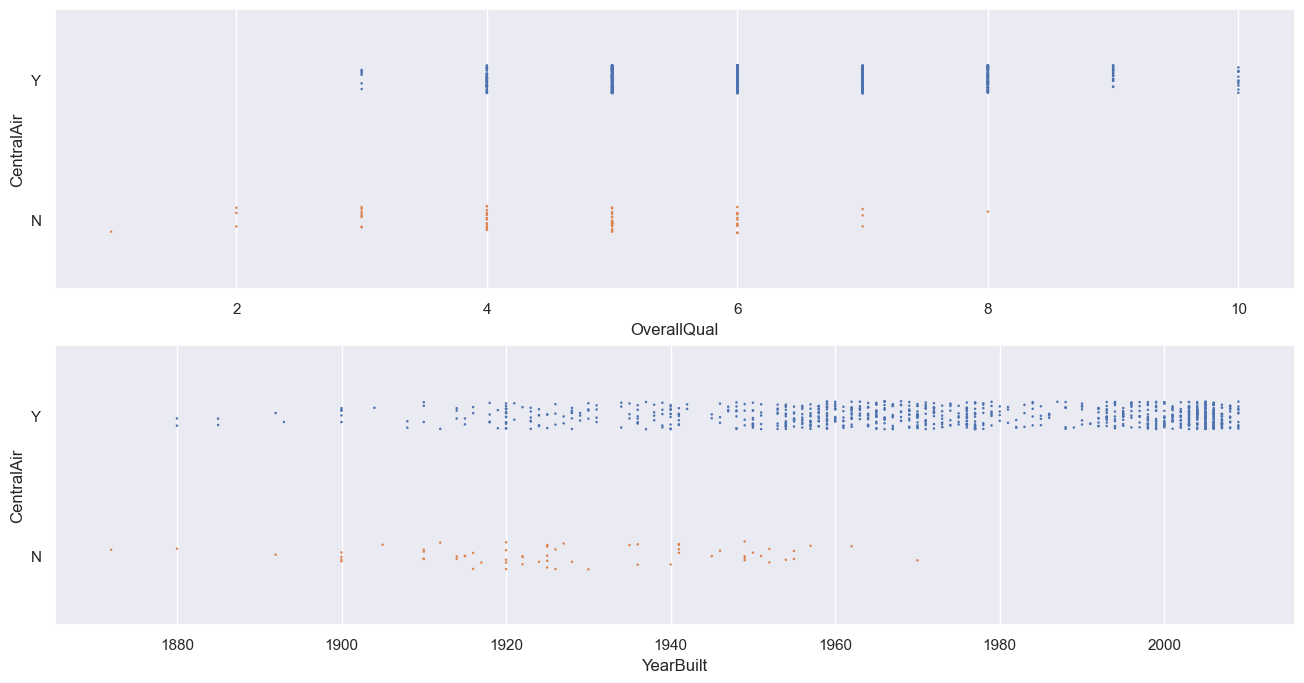

In [397]:
overallDF = pd.concat([overallqual_train,centralair_train], axis = 1).reindex(overallqual_train.index)
yearDF = pd.concat([yearbuilt_train,centralair_train], axis = 1).reindex(yearbuilt_train.index)

f , ax= plt.subplots(2,1,figsize=(16, 8))
sb.stripplot(x = "OverallQual", y = "CentralAir", data = overallDF, orient = "h", s = 1.8, ax = ax[0])
sb.stripplot(x = "YearBuilt", y = "CentralAir", data = yearDF, orient = "h", s = 1.8, ax= ax[1])

Swarmplot Analysis: Both variables have similar attributes when plotted against "CentralAir", they have somewhat similar relationship visually.  -<br>
By visual analysis we can observed that buildings with "CentralAir" have a higher "OverallQual" rating than buildings without "CentralAir". Similarly, we can see that "CentralAir" was gradually introduced in 1880s and by 1970s, most of the buildings built have "CentralAir". However, "OverallQual" may be the better predictor as compared to "YearBuilt", since its a categorical variable which provides a clear cut partition when compared against "CentralAir". On the other hand, "YearBuilt" is numeric hence partiton might not be as clear as using "OverallQual" as a predictor. However, all these analysis are based off visual observation and may be inconsistent, we can further cement this conclusion through decision tree and confusion matrix analysis.

#### Decision Tree (OverallQual & YearBuilt)

In [398]:
# function to print TN, FN, TP, FP for a binary classification

def TruePosAndNeg(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

#funciton to do classification

def classification(predict, response):
    # split the dataset into train and test
    x_train, x_test, y_train, y_test = train_test_split(predict, response, test_size=0.20)
    # decision tree using train data
    decisionTree = DecisionTreeClassifier(max_depth=4)
    decisionTree.fit(x_train, y_train)
    # predict response corresponding to predictors
    y_train_pred = decisionTree.predict(x_train)
    y_test_pred = decisionTree.predict(x_test)
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", decisionTree.score(x_train, y_train))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", decisionTree.score(x_test, y_test))
    print()
    # Plot the Confusion Matrix for Train and Test (uncomment to print out)

    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(
        confusion_matrix(y_train, y_train_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[0],
    )
    sb.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[1],
    )
    # print classification metric
    [TPR_train, FPR_train] = TruePosAndNeg(y_train, y_train_pred)
    [TPR_test, FPR_test] = TruePosAndNeg(y_test, y_test_pred)
    print("True Positive Rate(TPR) for train\t:", [TPR_train, FPR_train][0])
    print("False Positive Rate(FPR) for train\t:", [TPR_train, FPR_train][1])
    print("True Positive Rate(TPR) for test\t:", [TPR_test, FPR_test][0])
    print("False Positive Rate(FPR) for test\t:", [TPR_test, FPR_test][1])

OverallQual Vs. CentralAir
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409246575342466

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822

True Positive Rate(TPR) for train	: 1.0
False Positive Rate(FPR) for train	: 0.9583333333333334
True Positive Rate(TPR) for test	: 1.0
False Positive Rate(FPR) for test	: 0.9130434782608695

------------------------------------------------------

YearBuilt Vs. CentralAir
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9409246575342466

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9212328767123288

True Positive Rate(TPR) for train	: 1.0
False Positive Rate(FPR) for train	: 0.971830985915493
True Positive Rate(TPR) for test	: 1.0
False Positive Rate(FPR) for test	: 0.9583333333333334


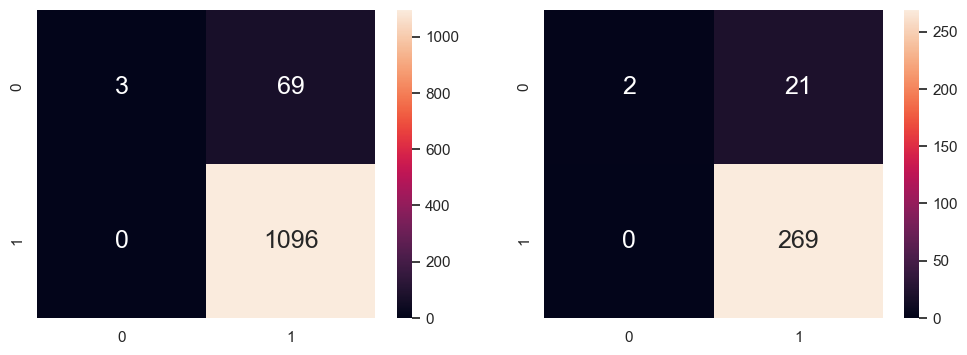

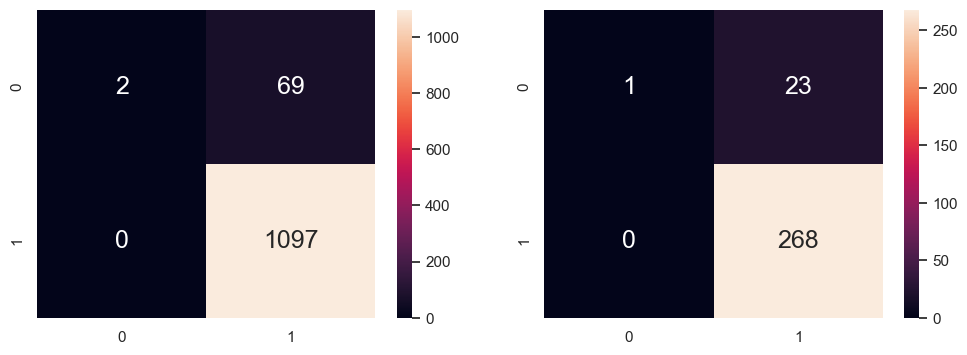

In [399]:
print("OverallQual Vs. CentralAir")
classification(overallqual, centralair)
print()

print("------------------------------------------------------")
print()

print("YearBuilt Vs. CentralAir")
classification(yearbuilt, centralair)

By analysis, we can see that the model of "OverallQual" variable has a higher classification accuracy as compared to "YearBuilt". However,

### Problem 3 : Understanding the Misclassified Samples

Print the Classification Tree of max depth 4 that you fit in Problem 1(a).

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes Central'),
 Text(0.22, 0.7, 'SalePrice <= 61691.5\ngini = 0.48\nsamples = 125\nvalue = [50, 75]\nclass = Yes Central'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = No Central '),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No Central '),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = No Central '),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes Central'),
 Text(0.16, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No Central '),
 Text(0.36, 0.5, 'SalePrice <= 98150.0\ngini = 0.454\nsamples = 112\nvalue = [39, 73]\nclass = Yes Central'),
 Text(0.28, 0.3, 'SalePrice <= 97750.0\ngini = 0.475\nsamples = 80\nvalue = [31, 49]\nclass = Yes Central'),
 Text(0.24, 0.1, 'gini = 0.467\nsamples = 78\nvalue = [29, 49]\nclass = Yes Central'),
 Text(0.32

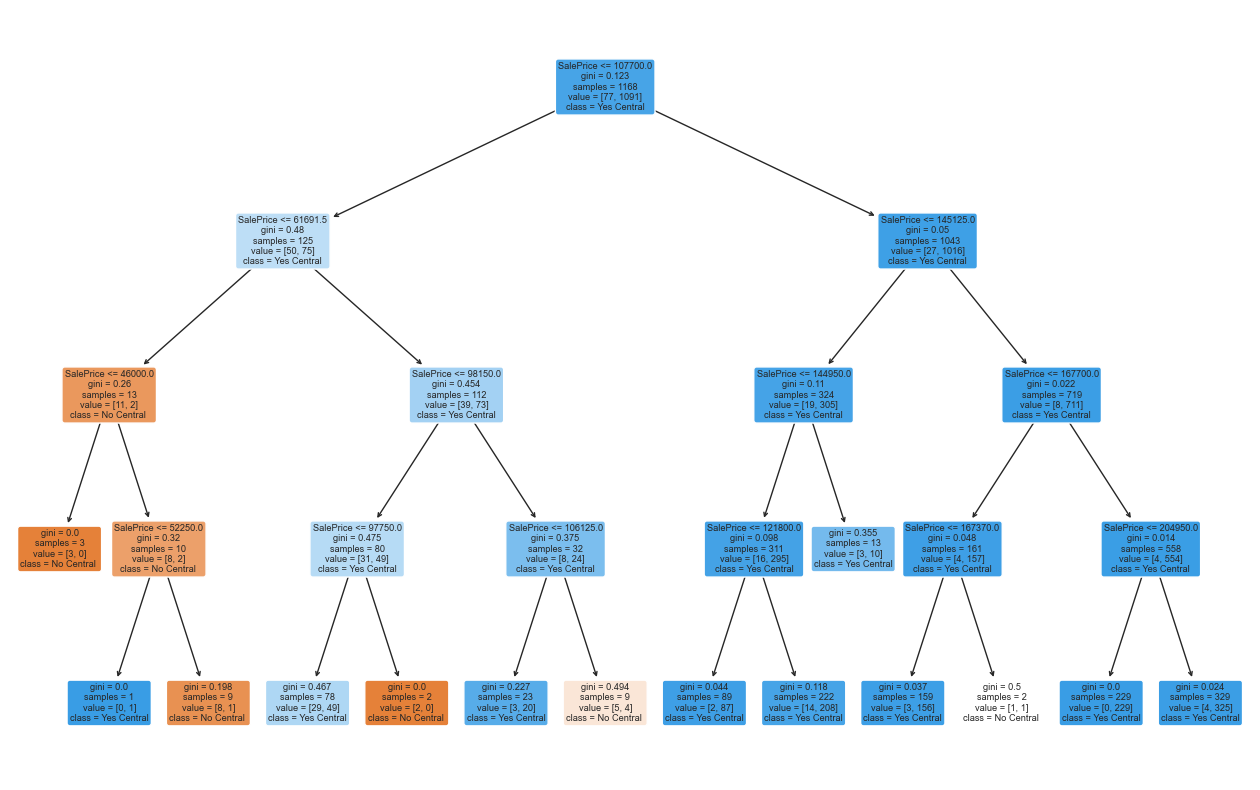

In [400]:
f = plt.figure(figsize=(16,10))
plot_tree(dectree_depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])

(a) Note that each leaf node of your tree 
represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and 
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.
<br><br>
Since we know that gini coefficient is inverse porportional to number of false predictions (the higher the gini, the higher the number of false predictions) 
<br> We can apply the same knowledge when "observing" the classification Tree above - we just have to look for the highest gini coefficient, then we can identify the "leaf node" that has the highest number of False Positives (FP) in the training dataset. After observation - we identified the left child of the root node has the highest gini coefficient of 0.491.

Since we know it resides at depth = 1, we can just call decisionTreeClassifier with parameter max_depth = 1. 

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes Central'),
 Text(0.22, 0.7, 'SalePrice <= 61691.5\ngini = 0.48\nsamples = 125\nvalue = [50, 75]\nclass = Yes Central'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = No Central '),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No Central '),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = No Central '),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes Central'),
 Text(0.16, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No Central '),
 Text(0.36, 0.5, 'SalePrice <= 98150.0\ngini = 0.454\nsamples = 112\nvalue = [39, 73]\nclass = Yes Central'),
 Text(0.28, 0.3, 'SalePrice <= 97750.0\ngini = 0.475\nsamples = 80\nvalue = [31, 49]\nclass = Yes Central'),
 Text(0.24, 0.1, 'gini = 0.467\nsamples = 78\nvalue = [29, 49]\nclass = Yes Central'),
 Text(0.32

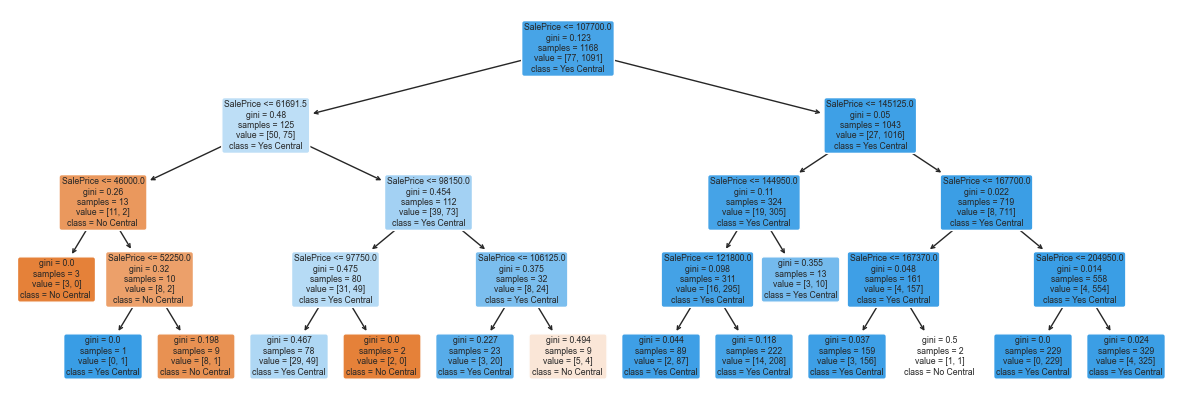

In [401]:
dectree_depth1 = DecisionTreeClassifier(max_depth = 1)
# Train the Decision Tree Classifier model

dectree_depth1.fit(saleprice_train,centralair_train)
f = plt.figure(figsize=(15,5))
plot_tree(dectree_depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])



By observation -> Samples between Saleprice 98150 and 61691.5 has a gini coefficient of 0.491. We can just loop through the dataset and look for all the samples that had SalePrice below or equal to 94250.

In [402]:


#we will retrain our model with depth 1 training 
depth1_predict = dectree_depth1.predict(saleprice_train)
#create a new column "CentralAir_predict" that will store our model 's result
trainDF['centralAir_predict'] = depth1_predict
# we then filter out those samples that are greater tha 94250.0
trainDF = trainDF[(trainDF["SalePrice"] <= 94250.0) & (trainDF["SalePrice"] >= 61691.5)]
#false_positives will entries that is 0 but our model says its 1.
false_positives = trainDF[(trainDF['centralAir_predict'] == "Y") & (trainDF["CentralAir"] == "N")]
false_positives.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1090 to 383
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SalePrice           27 non-null     int64 
 1   CentralAir          27 non-null     object
 2   centralAir_predict  27 non-null     object
dtypes: int64(1), object(2)
memory usage: 864.0+ bytes
